In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten,MaxPool2D, BatchNormalization, Conv2D, InputLayer
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.optimizers import Adam
from keras.utils import Sequence
from keras.utils import to_categorical

from albumentations import (Blur, MotionBlur, MedianBlur, GaussianBlur, GaussNoise, RandomGamma,
                            HorizontalFlip, ShiftScaleRotate, RandomBrightnessContrast, JpegCompression, 
                            RandomShadow, ISONoise, Equalize, FancyPCA, CLAHE, OneOf, Compose)

Using TensorFlow backend.


In [2]:
# def aug_image(image):
#     p = 0.2
#     aug = Compose([
#                    OneOf([
#                           Blur(p=p, blur_limit= (2,2)),
#                           MotionBlur(blur_limit=3,p = p),
#                           MedianBlur(blur_limit=3,p = p),
#                           GaussianBlur(blur_limit=3,p = p),
#                           GaussNoise(p = p),
#                           RandomGamma(p = p)
#                    ],p = p),
#                    HorizontalFlip(p=p),
#                    ShiftScaleRotate(shift_limit=0.06, scale_limit=0.2, rotate_limit=15, border_mode = 4, p=p),
#                    RandomBrightnessContrast(p=p),
#                    RandomShadow(p = p, num_shadows_lower=1, num_shadows_upper=3, shadow_dimension=4)
#     ],p=p)
#     image = aug(image = image)['image']
#     return image
# imagegen = ImageDataGenerator(preprocessing_function=aug_image,rescale=1./255)
# imagegen_ = ImageDataGenerator(preprocessing_function=None,rescale=1./255)
# train = imagegen.flow_from_directory("data/seg_train/seg_train",target_size=(150,150),batch_size=128)
# val = imagegen_.flow_from_directory("data/seg_test/seg_test",target_size=(150,150),batch_size=128)

In [3]:
# model = VGG16(include_top=False, input_shape=(150,150, 3))
# for layer in model.layers:
# 	layer.trainable = False

# x = Flatten()(model.output)
# x = BatchNormalization()(x)
# x = Dense(4096, activation='relu')(x)
# x = Dense(4096, activation='relu')(x)
# x = Dropout(0.2)(x)
# x = Dense(256, activation = 'relu')(x)
# x = Dense(6, activation='softmax')(x)

# model = Model(inputs=model.inputs, outputs=x)

# model.get_layer('block5_conv1').trainable = True
# model.get_layer('block5_conv2').trainable = True
# model.get_layer('block5_conv3').trainable = True

# model.summary()

In [4]:
model = Sequential()

model.add(InputLayer(input_shape = (224,224,3)))
model.add(Conv2D(32, kernel_size = (5,5), activation = 'relu', strides = (1,1), padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (5,5), activation = 'relu', strides = (1,1), padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.20))
model.add(Dense(512, activation = "relu"))
model.add(Dense(1, activation = "softmax"))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      2432      
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
______________________________________

In [5]:
# import os
# import numpy as np
# import cv2
# class DataGenerator(Sequence):
#     def __init__(self, dataframe, image_path, batch_size = 32, mode = "train"):
#         self.dataframe = dataframe
#         self.batch_size = batch_size
#         self.mode = mode
#         self.folder_path = image_path
#         self.labels = self.dataframe["emergency_or_not"].values
#         # self.labels = to_categorical(self.labels)
#         self.img_list = self.dataframe["image_names"].tolist()
        
#     def on_epoch_end(self):
#         self.indexes = np.arange(self.img_list)
#         if self.mode == "train":
#             self.indexes = random.sample(self.indexes, k = len(self.indexes))
    
#     def __len__(self):
#         return(self.dataframe.shape[0]//self.batch_size)
    
#     def get_batch_features(self, idx):
#         # img_name_list = [im for im in self.img_list[idx * self.batch_size : (1+idx) * self.batch_size]] 
#         # print("image_name_list -----",img_name_list,"\n\n\n\n\n")
#         # images = [self.get_image(i) for i in img_name_list]
#         # return(np.array(images))
#         return(self.np.array([self.cv2.imread(self.folder_path+im) for im in self.img_list[idx * self.batch_size : (1+idx) * self.batch_size]]))
    
#     def get_batch_labels(self,idx):
#         return(self.np.array(self.labels[idx * self.batch_size : (1+idx) * self.batch_size]))
    
#     def get_image(self,img_name):
#         print("folder path -----",self.folder_path,"\n\n\n\n\n")
#         print("image name ------",img_name,"\n\n\n\n\n")
#         img = self.cv2.imread(self.join(self.folder_path,img_name))
#         img = self.cv2.cvtColor(img, self.cv2.COLOR_BGR2RGB) 
#         img = img/255.0
#         return img
        
#     def __getitem__(self, idx):
#         batch_X = self.get_batch_features(idx)
#         batch_Y = self.get_batch_labels(idx)
#         return(batch_X,batch_Y)

In [6]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import math

# Here, `x_set` is list of path to the images
# and `y_set` are the associated classes.

class DataGenerator(Sequence):

    def __init__(self, dataframe, image_path, batch_size = 32, mode = "train"):
        self.dataframe = dataframe
        self.batch_size = batch_size
        self.mode = mode
        self.folder_path = image_path
        self.labels = self.dataframe["emergency_or_not"].values
        self.img_list = self.dataframe["image_names"].tolist()
        # self.labels = to_categorical(self.labels)


    def __len__(self):
        return math.ceil(self.dataframe.shape[0]/self.batch_size)

    def read(self,file_name):
        return resize(imread(self.folder_path+file_name), (224, 224))

    def __getitem__(self, idx):
        batch_x = self.img_list[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.labels[idx * self.batch_size:(idx + 1) * self.batch_size]

        return np.array([self.read(file_name) for file_name in batch_x]), np.array(batch_y)

In [15]:
labels = df["emergency_or_not"].values

In [17]:
to_categorical(labels)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [7]:
import pandas as pd
df = pd.read_csv("data/ana_vid_vehicle_classification/train.csv")

In [8]:
df.shape[0]

1646

In [9]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df, test_size=0.2)

In [10]:
train_generator = DataGenerator(train, "data/ana_vid_vehicle_classification/images/")
val_generator = DataGenerator(val, "data/ana_vid_vehicle_classification/images/")

In [11]:
opt = Adam(lr = 0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')

In [12]:
epochs = 2

In [13]:
history = model.fit_generator(train_generator, epochs=epochs, steps_per_epoch = 4, validation_data=val_generator, verbose = 1, callbacks=[learning_rate_reduction, early_stopping])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/2
4/4 [==============================] - 31s 8s/step - loss: 8.0078 - accuracy: 0.4200 - val_loss: 9.1495 - val_accuracy: 0.4333
Epoch 2/2
4/4 [==============================] - 33s 8s/step - loss: 10.1822 - accuracy: 0.3359 - val_loss: 9.1495 - val_accuracy: 0.4333


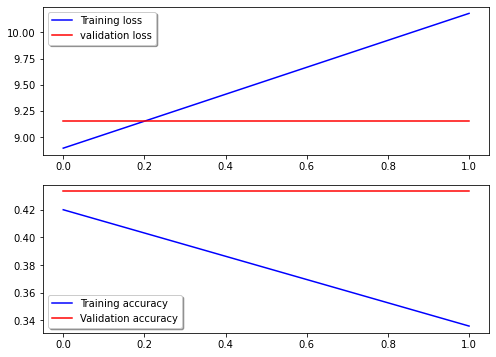

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

fig, ax = plt.subplots(2,1, figsize=(8, 6))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)